# 2021/5/14 クラスタリング - 自己組織化マップ
###### irisデータに自己組織化マップを適用してみる

<module 'matplotlib.pyplot' from 'C:\\Users\\nakam\\anaconda3_1\\lib\\site-packages\\matplotlib\\pyplot.py'>

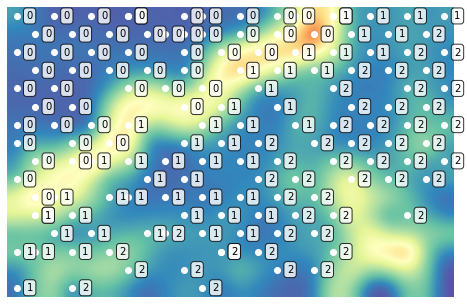

In [1]:
import numpy as np

from somoclu import Somoclu
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


# データを読み込む
dataset = load_iris()
X = dataset.data
y = dataset.target

# SOMに入れる前にPCAして計算コスト削減を測る（iris程度では無駄） 
pca = PCA(n_components=2) 
X = pca.fit_transform(X)

# SOMの定義
n_rows = 16
n_cols = 24
som = Somoclu(n_rows=n_rows, n_columns=n_cols,
              initialization="pca", verbose=2)

# 学習
som.train(data=X, epochs=1000)

# U-matrixをファイル出力
# 色が明るい部分が縮尺が縮んでいる
som.view_umatrix(labels=y, bestmatches=True,
                 filename="umatrix.png")